In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv('raw-data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Shape : ", df.shape)
print('\n Data Types: \n', df.dtypes)

print('\n Missing values : \n', df.isnull().sum())

Shape :  (284807, 31)

 Data Types: 
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

 Missing values : 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class    

Class
0    284315
1       492
Name: count, dtype: int64

 Class Ratio (Fradulent) : 0.172749


Text(0.5, 1.0, 'Class Distribution (0 - Non-Fraud, 1 - Fraud)')

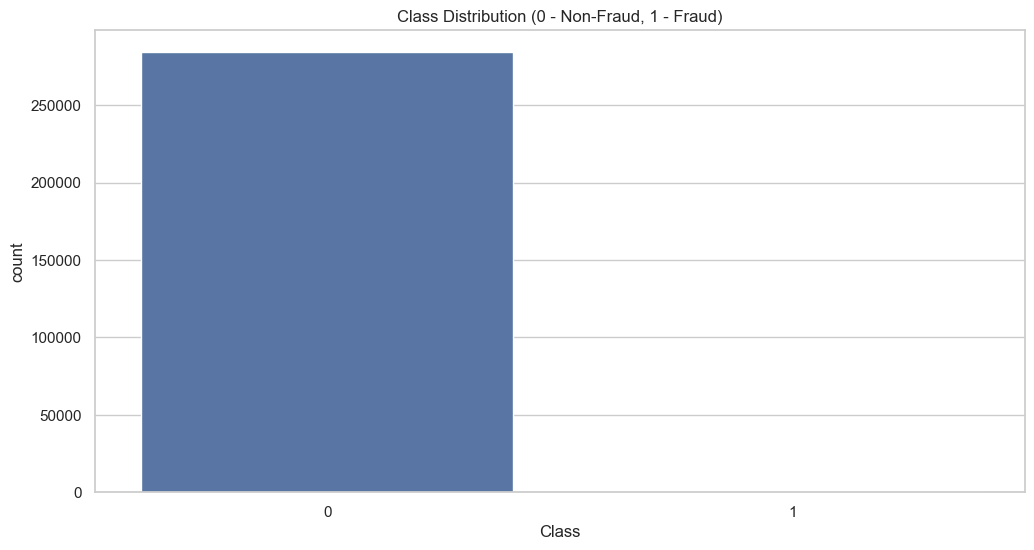

In [4]:
print(df['Class'].value_counts())
print('\n Class Ratio (Fradulent) : {:.6f}'.format(df['Class'].mean() * 100))

sns.countplot(data = df, x = 'Class')
plt.title('Class Distribution (0 - Non-Fraud, 1 - Fraud)')

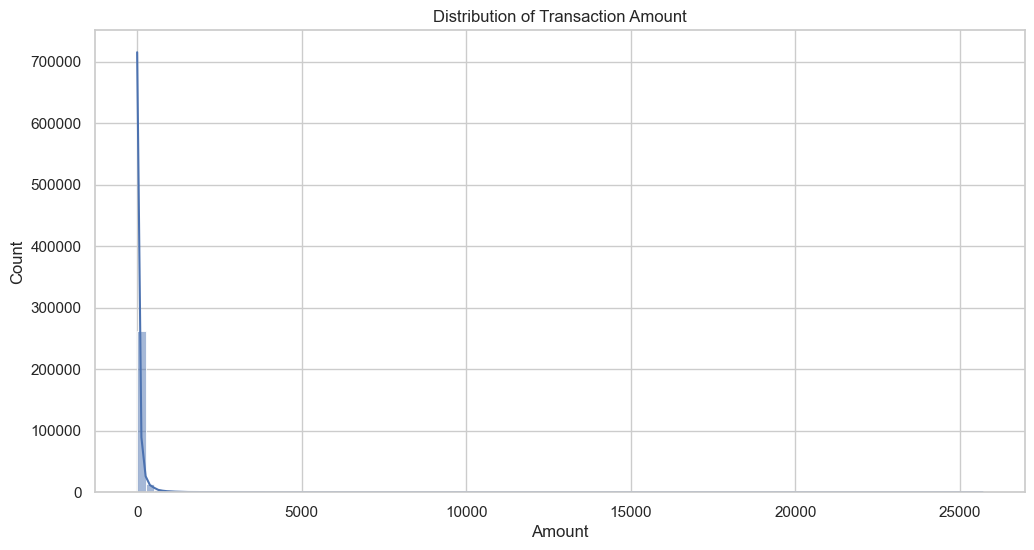

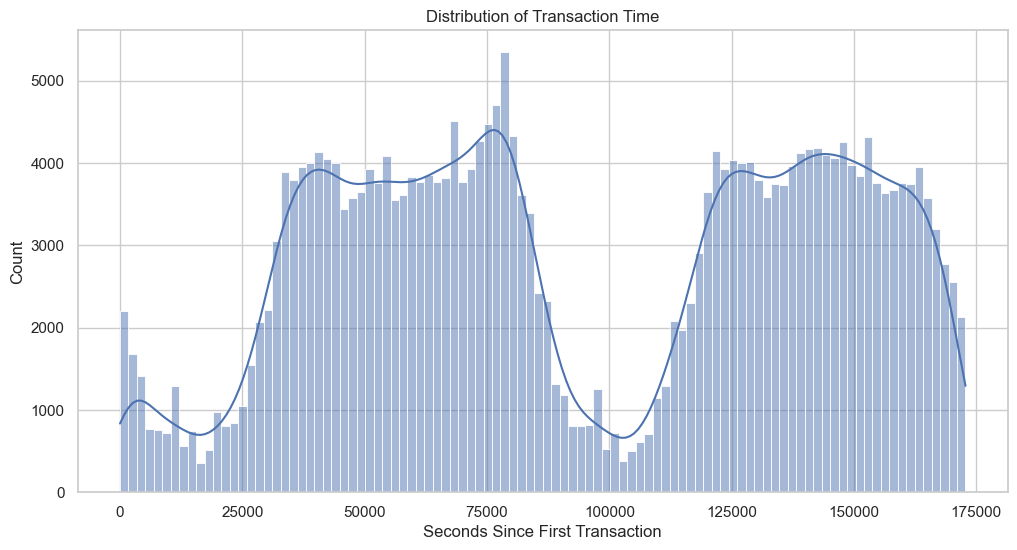

In [5]:
sns.histplot(df['Amount'], bins = 100, kde = True)
plt.title('Distribution of Transaction Amount')
plt.show()

sns.histplot(df['Time'], bins = 100, kde = True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Seconds Since First Transaction')
plt.show()


 Top Correlated Features with Class : 
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


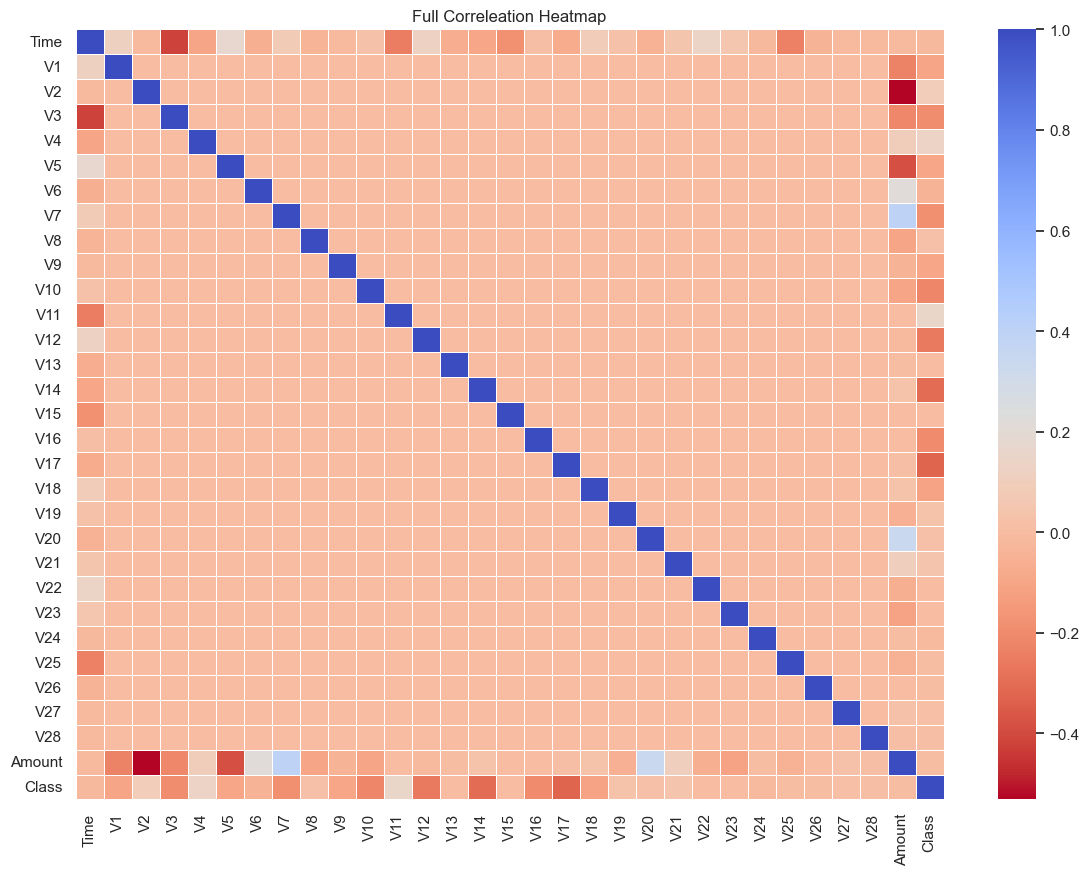

In [6]:
corr_matrix = df.corr()

corr_class = corr_matrix['Class'].sort_values(ascending = False)
print('\n Top Correlated Features with Class : \n', corr_class.head(10))

plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, cmap = 'coolwarm_r', annot = False, linewidths=0.5)
plt.title('Full Correleation Heatmap')
plt.show()

In [7]:
corr_matrix = df.corr()

corr_class = corr_matrix['Class'].sort_values(ascending = False)
print(corr_class.head(10))
print(corr_class.tail(10))



Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


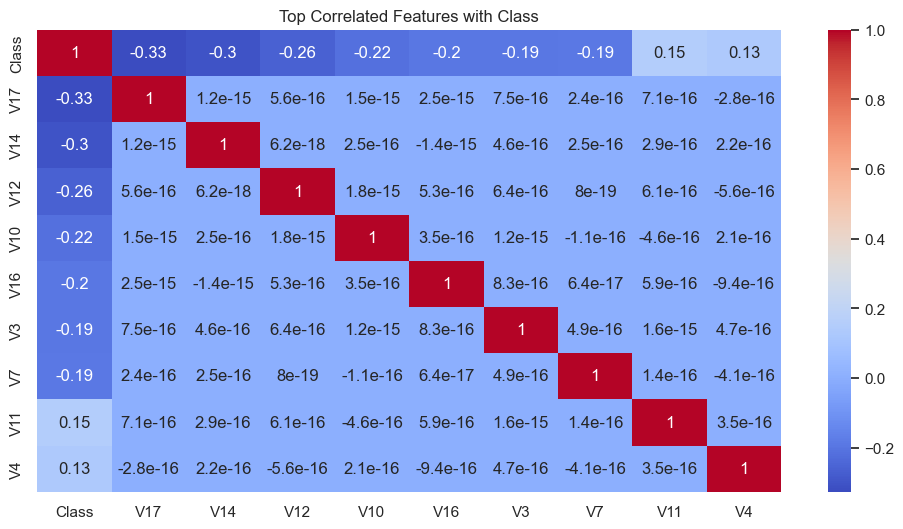

In [8]:
top_corr_features = corr_class.abs().sort_values(ascending = False).head(10).index
sns.heatmap(df[top_corr_features].corr(), annot = True, cmap ='coolwarm')
plt.title('Top Correlated Features with Class')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[['Amount','Time']] = scaler.fit_transform(df_scaled[['Amount', 'Time']])

X = df_scaled.drop('Class', axis = 1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state=42)

print('Training shape : ', X_train.shape, y_train.shape)
print('Testing shape : ', X_test.shape, y_test.shape)
print('Fraud ratio in training set : ', y_train.mean()* 100)

Training shape :  (227845, 30) (227845,)
Testing shape :  (56962, 30) (56962,)
Fraud ratio in training set :  0.17292457591783889


In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Before SMOTE : ', Counter(y_train))
print('After SMOTE : ', Counter(y_train_res))

Before SMOTE :  Counter({0: 227451, 1: 394})
After SMOTE :  Counter({0: 227451, 1: 227451})


In [ ]:
her iki classimiz 10000 dene deyer olsun (0 ve 1 den sohbet gedir)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = XGBClassifier(n_estimators = 100, max_depth = 5, use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classifaction Report : \n', classification_report(y_test, y_pred, digits = 1))
print('ROC-AUC score : {:.4f}'.format(roc_auc_score(y_test, y_proba)))


c:\Users\mmmdu\Anaconda3\envs\uze\lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix : 
 [[56821    43]
 [   12    86]]
Classifaction Report : 
               precision    recall  f1-score   support

           0        1.0       1.0       1.0     56864
           1        0.7       0.9       0.8        98

    accuracy                            1.0     56962
   macro avg        0.8       0.9       0.9     56962
weighted avg        1.0       1.0       1.0     56962

ROC-AUC score : 0.9794


In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state = 42)
log_reg.fit(X_train_res, y_train_res)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

print('Logistic Regression')
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred_lr))
print('\n Classification Report : \n', classification_report(y_test, y_pred_lr, digits = 4))
print('ROC-AUC score : {:.4f}'.format(roc_auc_score(y_test, y_proba_lr)))

Logistic Regression
Confusion Matrix : 
 [[55406  1458]
 [    8    90]]

 Classification Report : 
               precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC-AUC score : 0.9698


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth = 8, class_weight = 'balanced',random_state = 42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print('Random Forest')
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred_rf))
print('\nClassification Report : \n', classification_report(y_test, y_pred_rf, digits = 4))
print('ROC-AUC score : {:.4f}'.format(roc_auc_score(y_test, y_proba_rf)))

Random Forest
Confusion Matrix : 
 [[56675   189]
 [   11    87]]

Classification Report : 
               precision    recall  f1-score   support

           0     0.9998    0.9967    0.9982     56864
           1     0.3152    0.8878    0.4652        98

    accuracy                         0.9965     56962
   macro avg     0.6575    0.9422    0.7317     56962
weighted avg     0.9986    0.9965    0.9973     56962

ROC-AUC score : 0.9781


In [29]:
from sklearn.metrics import accuracy_score
model_tuned = XGBClassifier(
    n_estimators = 300,
    max_depth = 6,
    learning_rate = 0.05,
    scale_pos_weight = 1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    eval_metric = 'logloss',
    random_state = 42
)

model_tuned.fit(X_train_res, y_train_res)

y_pred_tuned = model_tuned.predict(X_test)
y_proba_tuned = model_tuned.predict_proba(X_test)[:,1]

print('Tuned XGBoost')
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred_tuned))
print('\n Classification Report : \n', classification_report(y_test, y_pred_tuned,digits = 4))
print('ROC-AUC score : {:.4f}'.format(roc_auc_score(y_test, y_proba_tuned)))
print(accuracy_score(y_test, y_pred_tuned))

Tuned XGBoost
Confusion Matrix : 
 [[56785    79]
 [   12    86]]

 Classification Report : 
               precision    recall  f1-score   support

           0     0.9998    0.9986    0.9992     56864
           1     0.5212    0.8776    0.6540        98

    accuracy                         0.9984     56962
   macro avg     0.7605    0.9381    0.8266     56962
weighted avg     0.9990    0.9984    0.9986     56962

ROC-AUC score : 0.9775
0.9984024437344194


In [ ]:
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# from sklearn.model_selection import train_test_split

# # Train test split (if needed)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Isolation Forest
# iso_forest = IsolationForest(contamination=0.001, random_state=42)  # contamination ~ fraud ratio
# iso_forest.fit(X_train)

# # Predict anomalies (fraudulent = -1, non-fraudulent = 1)
# y_pred_iso = iso_forest.predict(X_test)
# y_pred_iso = [1 if i == -1 else 0 for i in y_pred_iso]  # Convert to binary 0 (non-fraud) and 1 (fraud)

# # Evaluate model performance
# print(confusion_matrix(y_test, y_pred_iso))
# print(classification_report(y_test, y_pred_iso))
# roc_auc = roc_auc_score(y_test, y_pred_iso)
# print(f"ROC-AUC score: {roc_auc:.4f}")

[[56838    26]
 [   72    26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.27      0.35        98

    accuracy                           1.00     56962
   macro avg       0.75      0.63      0.67     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC score: 0.6324


In [31]:
import joblib 
from xgboost import XGBClassifier

joblib.dump(model_tuned, 'xgb_mddel.pkl')


['xgb_mddel.pkl']

In [2]:
import pandas as pd

# Orijinal büyük veri setini oku
df = pd.read_csv("raw-data\creditcard.csv")

# Her iki sınıftan da orantılı şekilde örnek al (örnek: 300 normal, 100 fraud)
fraud = df[df['Class'] == 1].sample(n=100, random_state=42)
non_fraud = df[df['Class'] == 0].sample(n=300, random_state=42)

# İkisini birleştir
sample_df = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)  # Karıştır

# Yeni küçük CSV dosyası olarak kaydet
sample_df.to_csv("creditcard_sample.csv", index=False)

print("✅ Sample CSV created: creditcard_sample.csv")


sample_df.to_csv("creditcard_sample_with_class.csv", index=False)
sample_df.drop('Class', axis=1).to_csv("creditcard_sample_without_class.csv", index=False)

✅ Sample CSV created: creditcard_sample.csv


In [4]:
df = pd.read_csv("creditcard_sample_with_class.csv")
print(df['Class'].value_counts())

Class
0    300
1    100
Name: count, dtype: int64
